## Page contain : Unsupervised Learning
### 1 . KMean without PCA
### 2 . KMean with PCA
### 3 . KMean with Kernel PCA

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['font.size']=14
pd.set_option('display.max_columns', 200)
from IPython.display import Image

In [3]:
fifa_data = pd.read_csv('fifa_18.csv')  
fifa_data.shape

(1000, 185)

In [4]:
fifa_data.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,

In [5]:
def types(df,col):
    return df[col]

In [6]:
32+48

80

In [7]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 816.5+ KB


In [8]:
df = fifa_data.copy()

In [9]:
dx =df[df.select_dtypes(include=['float64','int64']).columns]

In [10]:
dx

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,20801,2228,32,185.0,80.0,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN
1,158023,2158,30,170.0,72.0,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN
2,190871,2100,25,175.0,68.0,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,78,53,77,56,36,90,80,81,92,21,24,33,9,9,15,15,11,84.0,89.0,88.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,89.0,88.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,NaN
3,176580,2291,30,182.0,86.0,97000000.0,510000.0,198900000.0,92,92,82,90,79,87,42,81,5,4,4,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,38,27,25,31,33,37,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN
4,167495,1493,31,193.0,92.0,61000000.0,230000.0,100700000.0,92,92,91,90,95,89,60,91,5,1,4,15,13,25,55,11,30,14,11,59,48,58,61,52,85,35,25,78,44,83,16,29,30,12,70,47,70,10,10,11,91,90,95,91,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,2040,26,175.0,73.0,9000000.0,31000.0,19600000.0,77,80,83,61,69,72,75,71,2,2,4,76,50,59,69,66,69,77,55,75,73,83,83,79,70,80,83,78,79,68,68,69,78,58,59,50,67,76,77,80,6,15,16,8,8,66.0,69.0,67.0,67.0,69.0,70.0,74.0,73.0,76.0,76.0,66.0,69.0,67.0,67.0,69.0,70.0,74.0,73.0,76.0,76.0,66.0,67.0,67.0,69.0,74.0,73.0,NaN
996,160087,2009,25,187.0,85.0,8000000.0,8000.0,10400000.0,77,77,72,62,74,69,75,81,1,2,3,71,56,62,75,45,72,81,77,77,71,72,72,51,81,55,73,61,76,88,72,77,76,52,72,67,67,77,76,76,11,15,8,7,7,67.0,69.0,68.0,70.0,73.0,71.0,76.0,75.0,75.0,75.0,67.0,69.0,68.0,70.0,73.0,71.0,76.0,75.0,75.0,75.0,67.0,68.0,70.0,73.0,76.0,75.0,NaN
997,31831,2005,34,185.0,83.0,4300000.0,9000.0,5400000.0,77,77,36,70,82,72,63,73,2,3,3,83,62,62,80,79,70,85,80,85,81,35,37,53,76,64,84,76,62,78,75,75,70,65,82,70,75,58,62,63,9,10,7,15,12,68.0,69.0,70.0,72.0,76.0,70.0,73.0,67.0,65.0,67.0,68.0,69.0,70.0,72.0,76.0,70.0,73.0,67.0,65.0,67.0,68.0,70.0,72.0,76.0,73.0,67.0,NaN
998,204120,1206,28,188.0,85.0,7000000.0,32000.0,11000000.0,77,78,79,75,74,80,35,77,1,1,3,15,14,19,17,13,14,17,16,38,20,34,35,32,68,53,20,70,35,73,16,29,22,15,68,13,60,19,18,18,79,75,74,77,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0


## 1 . KMean without PCA

In [11]:
data = fifa_data.loc[:, ['ball_control', 'sprint_speed']] 
data.head()

,ball_control,sprint_speed
0,93,91
1,95,87
2,95,90
3,91,77
4,48,61


## In Stage one taking only two features at later stage, will take all features and  perform different types of pca.

In [12]:
#standardScaler
ss = StandardScaler()
data.loc[:] = ss.fit_transform(data)
data.head()

,ball_control,sprint_speed
0,1.145947,1.496995
1,1.251862,1.210392
2,1.251862,1.425344
3,1.040032,0.493887
4,-1.237139,-0.652521


## Kmean

In [13]:
model = KMeans(random_state=1,n_clusters=4)
model.fit(data)

KMeans(n_clusters=4, random_state=1)

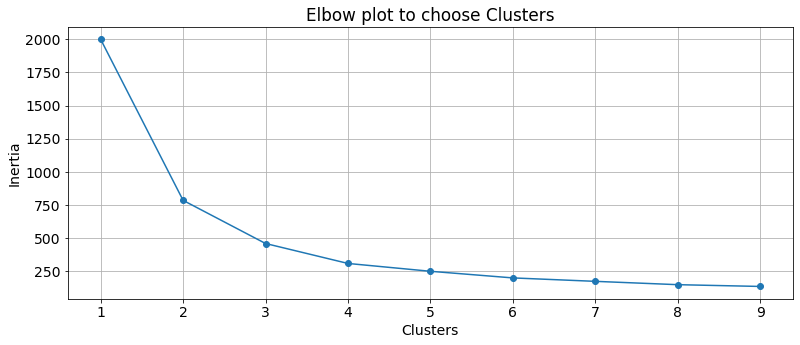

In [14]:
inertia= []
clusters= np.arange(1, 10)

for x in clusters:
    model=KMeans(x, random_state=1)
    model.fit(data)
    inertia.append(model.inertia_)
    
plt.figure(figsize=(13,5))
plt.grid(True)
plt.plot(clusters, inertia, '-o')
plt.xticks(clusters)
plt.title('Elbow plot to choose Clusters')
plt.ylabel('Inertia')
plt.xlabel('Clusters')
plt.show()

## From elbo plot it is clear that 3 clusters are best to choose as per Interia

In [15]:
model_new = KMeans(random_state=1,n_clusters=3)
model_new.fit(data)

KMeans(n_clusters=3, random_state=1)

In [16]:
## Finding number of data in columns

In [17]:
cluster_map_b_pca= pd.DataFrame()
cluster_map_b_pca['data_index'] = data.index.values
cluster_map_b_pca['cluster'] = model_new.labels_


In [18]:
cluster_map_b_pca['cluster'].value_counts() # Clusters one have 537 data points

1    537
2    346
0    117
Name: cluster, dtype: int64

In [19]:
model_new.cluster_centers_

array([[-2.50495009, -1.5698931 ],
       [ 0.4386285 ,  0.72728602],
       [ 0.16707287, -0.59408592]])

In [20]:
model.n_features_in_

2

In [21]:
# Finding Ronalod and Messi in which cluster and where.

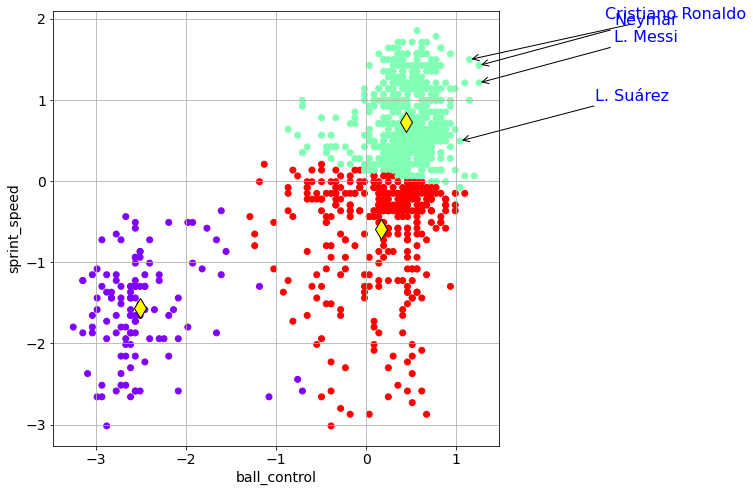

In [22]:
model = KMeans(3, random_state=1)  
model.fit(data) 
plt.figure(figsize=(8, 8))  
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = model.labels_, cmap='rainbow') 
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.grid(True)

centroids = model.cluster_centers_
for ind in range(3):
    plt.scatter(centroids[ind][0], centroids[ind][1], color = 'yellow', marker='d', s=200, edgecolors='k')

    
for ind in range(4):
    plt.annotate(s= fifa_data['name'][ind], 
                 xy = (data.iloc[ind, 0], data.iloc[ind, 1]), 
                 xytext = (data.iloc[ind, 0]+1.5, data.iloc[ind, 1]+0.5),
                 arrowprops=dict(arrowstyle='->'), fontsize=16, c= 'b')
    
plt.show()

## 1 . KMean with PCA

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 816.5+ KB


In [24]:
df_int =df[df.select_dtypes(include= ['float64','int64']).columns]#

In [25]:
df_int.shape

(1000, 80)

In [26]:
df_int.fillna(0,inplace=True)

In [27]:
df_int.head(3) # Takeing only mumeric columns

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,20801,2228,32,185.0,80.0,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,0.0
1,158023,2158,30,170.0,72.0,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,0.0
2,190871,2100,25,175.0,68.0,123000000.0,280000.0,236800000.0,92,94,92,84,79,95,30,60,5,5,5,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,78,53,77,56,36,90,80,81,92,21,24,33,9,9,15,15,11,84.0,89.0,88.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,89.0,88.0,88.0,79.0,87.0,59.0,46.0,59.0,64.0,84.0,88.0,88.0,79.0,59.0,46.0,0.0


In [28]:
df_int.loc[:] = ss.fit_transform(df_int)
df_int.head()

,ID,special,age,height_cm,weight_kg,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk
0,-4.689634,1.287681,1.278560,0.399508,0.380062,5.669160,7.992613,5.935501,4.662626,3.177755,1.408705,1.859360,1.200250,1.516023,-1.267680,0.791290,3.49595,2.281257,1.011623,1.101857,1.621480,1.302216,0.729920,1.464377,1.099248,0.905964,0.962925,0.716938,1.145947,1.324356,1.496995,1.342009,3.895783,-0.224560,1.363641,2.155714,1.333102,0.732958,1.422127,-0.153864,-1.171981,1.423207,1.218773,1.422443,2.116507,-1.087707,-0.952401,-1.125537,-0.504916,-0.327943,-0.120767,-0.183055,-0.321586,1.243190,1.108565,1.103070,1.004725,0.760485,1.010503,0.053969,-0.193044,0.062055,0.229639,1.243190,1.108565,1.103070,1.004725,0.760485,1.010503,0.053969,-0.193044,0.062055,0.229639,1.243190,1.103070,1.004725,0.760485,0.053969,-0.193044,-0.356626
1,-0.774617,1.024797,0.730997,-1.763111,-0.693938,6.363051,7.992613,6.644882,4.319685,2.904635,1.322667,1.640337,1.653517,2.151673,-1.617523,-1.435055,3.49595,1.279388,1.011623,0.727522,1.665493,0.485870,1.048774,1.326410,1.377539,1.270574,1.621527,1.360219,1.251862,1.530685,1.210392,1.412407,3.681917,1.868018,0.879508,-0.203218,0.113371,-1.062460,1.238437,-0.988572,-1.465595,1.337631,1.565805,1.041266,2.216000,-1.430591,-1.068124,-1.011567,-0.549430,-0.327943,-0.120767,-0.183055,-0.451014,1.073824,1.108565,1.144016,1.127313,0.845040,1.051607,-0.073516,-0.522541,-0.110920,0.055670,1.073824,1.108565,1.144016,1.127313,0.845040,1.051607,-0.073516,-0.522541,-0.110920,0.055670,1.073824,1.144016,1.127313,0.845040,-0.073516,-0.522541,-0.356626
2,0.162554,0.806979,-0.637911,-1.042238,-1.230939,7.677792,3.396080,7.427021,3.976744,3.177755,1.580782,1.202291,0.860300,2.045731,-1.417613,-1.552231,3.49595,2.281257,2.344460,0.633938,1.401415,0.053687,0.602379,1.234433,1.331157,0.905964,1.339269,0.588281,1.251862,1.668238,1.425344,1.834799,2.184855,1.017908,0.610546,-0.814792,0.434353,-1.575437,0.733290,-0.543395,-0.878367,1.209268,0.871742,1.204628,1.818029,-1.125805,-1.222421,-0.745635,-0.415889,-0.419766,-0.120767,-0.137923,-0.321586,0.904458,1.026900,0.980234,0.963863,0.633653,0.928295,-0.073516,-0.481354,-0.024433,0.142655,0.904458,1.026900,0.980234,0.963863,0.633653,0.928295,-0.073516,-0.481354,-0.024433,0.142655,0.904458,0.980234,0.963863,0.633653,-0.073516,-0.481354,-0.356626
3,-0.245175,1.524277,0.730997,-0.033016,1.185562,5.778721,7.105563,6.048274,3.976744,2.631514,0.720399,1.640337,0.860300,1.198199,-0.817882,0.908466,3.49595,1.279388,1.011623,0.727522,1.621480,0.773992,0.729920,1.464377,0.867339,1.133845,1.339269,-0.119329,1.040032,1.255580,0.493887,1.130813,3.254185,-0.420739,0.987094,-0.115850,1.140513,0.732958,1.146592,0.680843,-0.668643,1.294843,1.149367,1.422443,0.922595,-0.782920,-0.412360,-0.555684,0.385353,0.314813,0.669206,0.674450,0.800125,1.073824,0.945235,0.980234,0.923001,0.675930,0.846087,0.181453,0.012892,0.191785,0.316624,1.073824,0.945235,0.980234,0.923001,0.675930,0.846087,0.181453,0.012892,0.191785,0.316624,1.073824,0.980234,0.923001,0.675930,0.181453,0.012892,-0.356626
4,-0.504375,-1.472601,1.004778,1.552905,1.991062,3.149239,2.589671,2.475902,3.976744,2.631514,1.494743,1.640337,2.673367,1.410082,0.081713,2.080227,3.49595,-1.726222,1.011623,-2.173581,-1.943567,-1.723066,-1.055661,-2.076764,-1.730040,-2.147643,-2.094875,-0.440970,-1.237139,-0.807709,-0.652521,-1.262740,1.543257,-2.055565,-2.348045,0.670461,-1.748324,0.989446,-2.067980,-2.045869,-1.130036,-2.1281

In [29]:
pca = PCA()
df_int_pca = pca.fit_transform(df_int)
print('PCA done')

PCA done


In [30]:
df_int_pca.shape[1]

80

In [31]:
np.round(pca.explained_variance_ratio_, 3) 

array([0.572, 0.162, 0.063, 0.04 , 0.033, 0.02 , 0.018, 0.011, 0.009,
       0.007, 0.006, 0.005, 0.005, 0.004, 0.004, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [32]:
plt.rcParams['axes.grid']= True
plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (40,5)

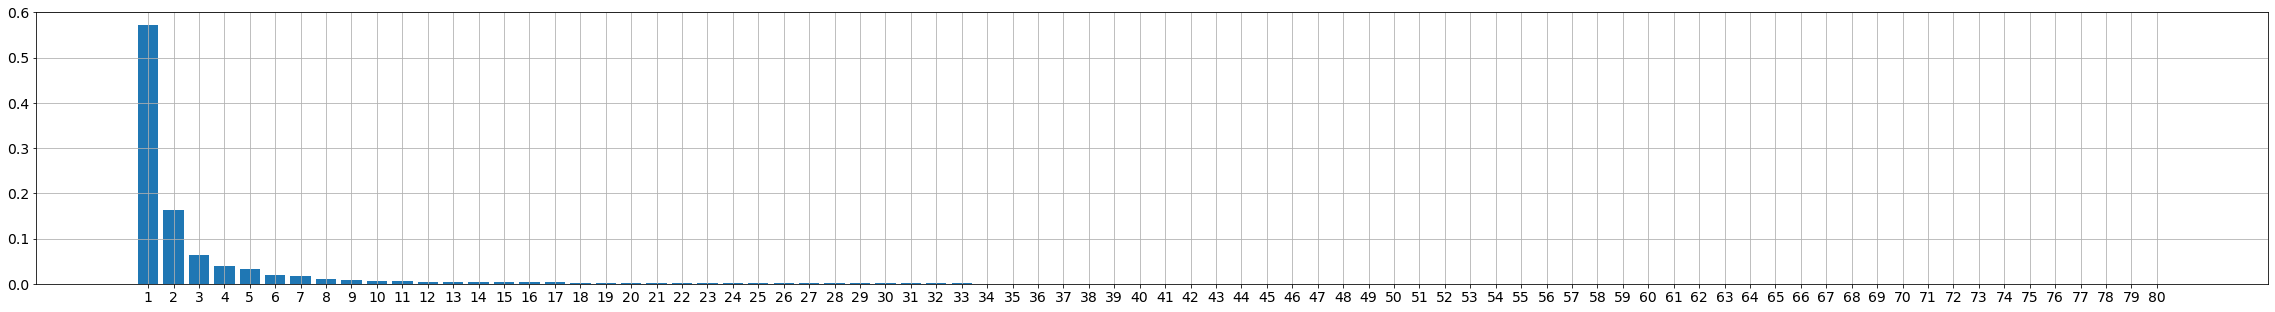

In [33]:
plt.bar(range(1, 81), pca.explained_variance_ratio_ )
plt.xticks(range(1, 81))
plt.show()

In [34]:
# From above plot its clear that pca for 20 data points are having its contribution

df_int_pca[:, :20]

array([[-6.39263932e+00,  6.68860281e+00,  1.27999286e+01, ...,
         2.19777616e-01,  1.66657601e+00, -1.32262883e+00],
       [-6.48728711e+00,  9.19808843e+00,  1.15094662e+01, ...,
         1.00366121e+00, -4.94010847e-01, -3.11899334e-02],
       [-5.79400660e+00,  8.64002636e+00,  9.99954772e+00, ...,
        -1.32027372e+00, -1.13496492e-01, -8.78050457e-01],
       ...,
       [-2.04497900e+00, -2.07973378e+00, -1.70749267e+00, ...,
        -1.83330346e-02,  2.44761795e-01, -7.44133878e-01],
       [ 1.84350802e+01,  9.31404461e-01, -1.87297252e+00, ...,
         5.94544932e-01, -6.92515287e-01, -1.68193340e-01],
       [-1.03267751e+00,  5.82046921e+00, -3.61631965e+00, ...,
         8.20377184e-01,  3.67019018e-01,  4.02887418e-01]])

In [35]:
pca = PCA(n_components= 20)
df_int_pca_final = pca.fit_transform(df_int_pca)
print('PCA Final done')

PCA Final done


In [36]:
df_int_pca_final.shape

(1000, 20)

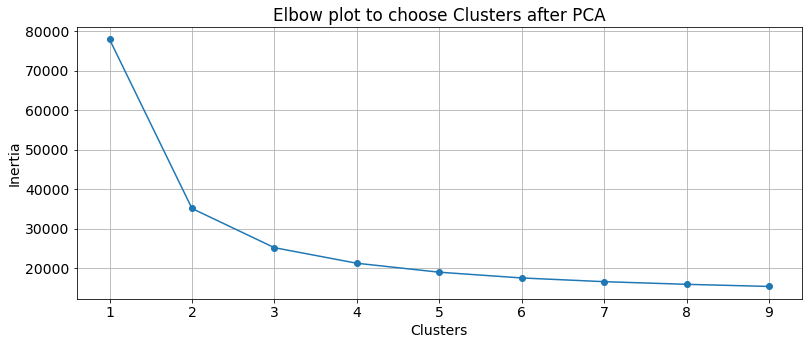

In [37]:
inertia= []
clusters= np.arange(1, 10)

for x in clusters:
    model=KMeans(x, random_state=1)
    model.fit(df_int_pca_final)
    inertia.append(model.inertia_)
    
plt.figure(figsize=(13,5))
plt.grid(True)
plt.plot(clusters, inertia, '-o')
plt.xticks(clusters)
plt.title('Elbow plot to choose Clusters after PCA')
plt.ylabel('Inertia')
plt.xlabel('Clusters')
plt.show()

In [38]:
model_final = KMeans(random_state=1,n_clusters=9)
model_final.fit(data)

KMeans(n_clusters=9, random_state=1)

In [39]:
cluster_map_a_pca= pd.DataFrame()
cluster_map_a_pca['data_index'] = data.index.values
cluster_map_a_pca['cluster'] = model_final.labels_

In [40]:
cluster_map_a_pca['cluster'].value_counts() # Clusters Eight have 353 data points

7    279
0    203
3    186
8    103
6     58
5     53
1     51
4     34
2     33
Name: cluster, dtype: int64

## we cannot plot as data dimention is greater than 2

## 3 . KMean with  Kernal PCA

In [41]:
from sklearn.decomposition import KernelPCA

In [55]:
def Kernal_pca(df,kernal):
    print('Shape of data before '+kernal+'_PCA',df.shape)
    temp=pd.DataFrame()
    temp = KernelPCA(kernel=kernal)
    temp = temp.fit_transform(df_int)
    print('Shape of data after '+kernal+'_PCA',temp.shape)
    return temp

In [56]:
X_transformed_linear = Kernal_pca(df_int,'linear')

Shape of data before linear_PCA (1000, 80)
Shape of data after linear_PCA (1000, 63)


In [57]:
X_transformed_poly = Kernal_pca(df_int,'poly')

Shape of data before poly_PCA (1000, 80)
Shape of data after poly_PCA (1000, 999)


In [58]:
X_transformed_rbf = Kernal_pca(df_int,'rbf')

Shape of data before rbf_PCA (1000, 80)
Shape of data after rbf_PCA (1000, 999)
